<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Fachhochschule_Südwestfalen_20xx_logo.svg/320px-Fachhochschule_Südwestfalen_20xx_logo.svg.png" WIDTH=250 ALIGN="right">
</figure>

# Skriptsprachen
### Sommersemester 2021
Prof. Dr. Heiner Giefers

## Aktienkurse mit Tkinter


In dieser Aufgabe wollen wir die Entwicklung von Aktienkursen mit einer grafischen Oberfläche in Python umsetzen.
Dazu werden wir eine Pakete einsetzen, die uns die Umsetzung der Aufgabe deutlich erleichtern:

 - Mit dem Modul **Tkinter** aus der Standardbibliothek können mit recht einfachen Mitteln grafische Oberflächen erstellt werden. Intern wird dabei das Tk-Toolkit verwendet.
 - Die **Matplotlib**-Bibliothek stellt Möglichkeiten zum Plotten verschiedenster Arten von Graphen zur Verfügung.
 - Für den Abruf von aktuellen Aktienkursen könnte man Reguläre Ausdrücke oder Web-Scraping Bibliotheken (wie etwas *Beautiful Soup*) verwenden. Wir wollen in dieser Aufgabe aber historische Kursdaten anzeigen. Daher verwenden wir das Modul **YFinance** (für *Yahoo Finance*) mit dem man auf Aktienkurs-Informationen aus der Vergangenheit zugreifen kann.
 - Wir werden sehen, dass *yfinance* ein **Pandas** *DataFrame* Objekt zurückliefert. Wir werden also auch diese Bibliothek, die in Python sehr verbreitet für das Verarbeiten Tabellarischer Daten eingesetzt wird, verwenden.


Fangen wir mit `yfinance` an. Zunächst muss die Bibliothek mit `pip install yfinance` installiert werden.
Wir importieren Sie unter dem Namen `yf`, erzeugen mit `yf.Ticker` ein Marktdaten-Objekt und laden die Daten der letzten fünf Jahre mit der Methode `history` herunter.
Das resultierende Objekt `prices` ist ein Pandas *DataFrame* mit diversen Aktienkurs-Informationen von, in diesem Fall, der Firma Apple. 

In [3]:
import yfinance as yf


stock     = 'AAPL'
stockname = 'Apple'
timespan  = '5y'

stock = yf.Ticker(stock)
prices = stock.history(period=timespan)
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-06-06,22.885193,23.796023,22.782434,23.034662,93170000,0.0,0.0
2016-06-07,23.179465,23.324264,23.111736,23.128084,89638000,0.0,0.0
2016-06-08,23.125751,23.251867,23.046346,23.107069,83392400,0.0,0.0
2016-06-09,23.004304,23.352287,22.994962,23.272882,106405600,0.0,0.0
2016-06-10,23.011312,23.202820,22.999636,23.081377,126851600,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-28,125.570000,125.800003,124.550003,124.610001,71311100,0.0,0.0
2021-06-01,125.080002,125.349998,123.940002,124.279999,67637100,0.0,0.0
2021-06-02,124.279999,125.239998,124.050003,125.059998,59278900,0.0,0.0


**Aufgabe: Welche Informationen enthält der Dataframe? Geben Sie eine Liste `cols` mit den Spaltennamen der Tabelle an. Setzen Sie den Wert `nrows` auf die Anzahl der Zeilen (=Datenpunkte) in der Tabelle.**

In [ ]:
cols = None
nrows = None
# YOUR CODE HERE
raise NotImplementedError()

list(cols.values)

In [ ]:
# Test Zelle

Pandas implementiert für *DataFrames* und *Series* (das sind eindimensionale Daten, z.B. eine Spalte eines DataFrames) eine `plot`-Funktion.
Dabei handelt es sich eigentlich um einen Wrapper für die `plot`-Funktion auf der *Matplotlib*.

<AxesSubplot:xlabel='Date'>

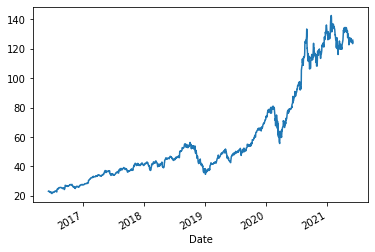

In [2]:
prices.Close.plot()

Nun wollen wir den Kursverlauf etwas schöner anzeigen un dabei auch die geglätteten Kurzen über einen Zeitraum von 14 und 100 Tagen anzeigen.

Wir plotten hier übrigens etwas umständlicher als normalerweise.
Das *Pyplot* Modul von Matplotlib liefert eine Schnittstelle, die sich an MATLAB orientiert und mit der in wenigen Zeilen ein Graph plotten lässt.
`plt.figure()` liefert eine solche *Pyplot* Grafik.
Über die Klasse `Figure` von Matplotlib können wir aber ein Grafikobjekt erstelln, dass sich später einfacher mit *Tkinter* darstellen lässt.
Daher plotten wir den Graphen zuerst in dieses *Figure* Objekt und stellen es dann über *Pyplot* dar.


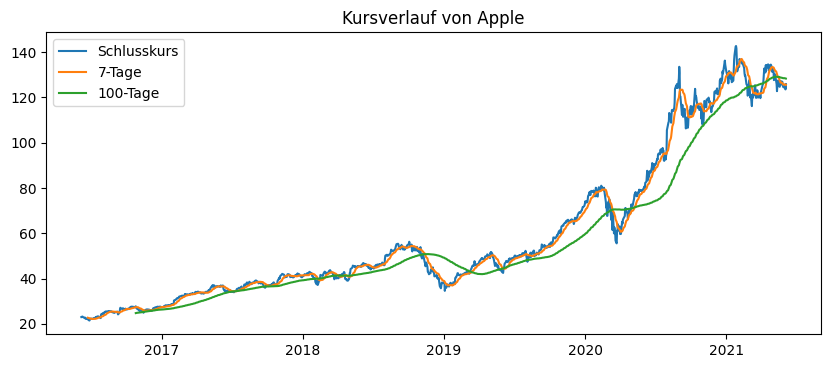

In [4]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt


fig = Figure(figsize=(10, 4), dpi=100)
fig.add_subplot(111)
prices['14d'] = prices['Close'].rolling(14).mean()
prices['100d'] = prices['Close'].rolling(100).mean()
charts = fig.get_axes()[0].plot(prices[['Close','14d','100d']])
fig.get_axes()[0].set_title(f'Kursverlauf von {stockname}')
fig.get_axes()[0].legend(iter(charts), ('Schlusskurs','7-Tage','100-Tage'))

dummy = plt.figure()
figmanager = dummy.canvas.manager
figmanager.canvas.figure = fig
fig.set_canvas(figmanager.canvas)
plt.show(fig)

**Aufgabe: Implementieren Sie die Funktion `stock_plot`, die einen Graphen für einen Aktienkurs erstellt. Die Funktion erhält als Parameter ein `Figure`-Objekt und das Kürzel `stock` eines Aktienkurses. Die optionalen Parameter sind die Dauer `span` für die Daten aus der Vergangenheit abgerufen werden sollen sowie der Name der Kurses. Ist keine Dauer angegeben, sollen die letzten 5 Jahre abgerufen werden. Als Name kann defaultmäßig das Kürzel der Aktie verwendet werden.**

In [5]:
from matplotlib.figure import Figure
import matplotlib.pyplot as plt

fig = Figure(figsize=(10, 4), dpi=100)
fig.add_subplot(111)

def stock_plot(fig, stock, span=None, stockname=None):
    # YOUR CODE HERE
    raise NotImplementedError()

stock_plot(fig, 'GOOG', '2y', 'Google')
    
dummy = plt.figure()
figmanager = dummy.canvas.manager
figmanager.canvas.figure = fig
fig.set_canvas(figmanager.canvas)
plt.show(fig)

NotImplementedError: 

Wir haben nun eine Grafik, die wir im Notebook anzeigen lassen können.
Unser nächstes Ziel ist nun, diese Grafik in eine *Tkinter* GUI zu integrieren.

**Achtung: Für die nächsten Aufgaben benötigen Sie eine lokale Python Installation.**

Schauen Wir uns zunächst ein kleines Beispiel an.
Die folgende Code-Zelle verwendet ein *Tkinter* um ein einfaches Fenster mit zwei Elementen anzuzeigen.
Der Obere Teil ist eine Matplotlib Abbildung, die eine Sinuskurze zeigt.
Im unteren Teil wird ein Button *Quit* angezeigt, mir dem das Fenster geschlossen werden kann.
Dazu registrieren wir die Funktion `_quit` im Button-Objekt als `command`.

In [ ]:
import tkinter

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import numpy as np

root = tkinter.Tk()
root.wm_title("Sinus")

fig = Figure(figsize=(5, 4), dpi=100)
t = np.arange(-np.pi, np.pi, .01)
fig.add_subplot(111).plot(t, np.sin(t))

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

def _quit():
    root.quit()
    root.destroy()

button = tkinter.Button(master=root, text="Quit", command=_quit)
button.pack(side=tkinter.BOTTOM)

tkinter.mainloop()


Matplotlib bietet neben der Klasse `FigureCanvasTkAgg` für `Tk`-Objekte, auch die die Klasse `NavigationToolbar2Tk` zum *navigieren* in Matplotlib Graphen.
Damit können Sie in den Graphen hineinzoomen oder die Kurven verschieben.

In [ ]:
import tkinter

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import numpy as np


root = tkinter.Tk()
root.wm_title("Sinus")

fig = Figure(figsize=(5, 4), dpi=100)
t = np.arange(-np.pi, np.pi, .01)
fig.add_subplot(111).plot(t, np.sin(t))

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)


def _quit():
    root.quit()
    root.destroy()

button = tkinter.Button(master=root, text="Quit", command=_quit)
button.pack(side=tkinter.BOTTOM)

tkinter.mainloop()

Bisher ist unsere GUI sehr statisch.
Wir fügen nun Radio-Buttons ein, mit den wir den Graphen von *Sinus* aud *Cosiunus* umstellen können.
Die Werte der Radio-Buttons sind an die *TKinter* String-Variable `funktion` gebunden.
Außerdem ist als Kommando eine Funktion `_refresh` abgegebe, mit welcher der Matplotlib Graph neu gezeichnet werden kann.

In [ ]:
import tkinter

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
import numpy as np


root = tkinter.Tk()
root.wm_title("Sinus")

fig = Figure(figsize=(5, 4), dpi=100)
t = np.arange(-np.pi, np.pi, .01)
fig.add_subplot(111).plot(t, np.sin(t))

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

toolbar = NavigationToolbar2Tk(canvas, root)
toolbar.update()
canvas.get_tk_widget().pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

funktion = tkinter.StringVar(value='sinus')


def _quit():
    root.quit()
    root.destroy()

def _refresh():
    global fig
    global canvas
    fig.get_axes()[0].clear()
    t = np.arange(-np.pi, np.pi, .01)
    if funktion.get()=='sinus':
        fig.get_axes()[0].plot(t, np.sin(t))
    else:
        fig.get_axes()[0].plot(t, np.cos(t))
    canvas.draw()

    
sin = tkinter.Radiobutton(root, text="Sinus", variable=funktion, value='sinus', command=_refresh)
cos = tkinter.Radiobutton(root, text="Cosinus", variable=funktion, value='cosinus', command=_refresh)
sin.pack(side=tkinter.LEFT)
cos.pack(side=tkinter.LEFT)
    
button = tkinter.Button(master=root, text="Quit", command=_quit)
button.pack(side=tkinter.BOTTOM)


tkinter.mainloop()


**Aufgabe: Übernehmen Sie oben verwendeten Funktionen um eine *TKinter* GUI zu entwickeln, mit der Sie die Aktienkurse von 
Apple (`aapl`), Facebook (`fb`), Google (`goog`), Netflix (`nflx`) und Microsoft (`msft`) anzeigen lassen können.
Als Zeitspanne sollen die letzten fünf, zwei und ein Jahre ausgewählt werden können.**

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()